In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [53]:
train_data = pd.read_json('data/train.json')

## Describe the data

In [3]:
train_data.shape

(49352, 15)

In [4]:
train_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [5]:
print 'Columns in training data:'
for column in train_data.columns.values:
    print column, type(train_data[column].values[0])

Columns in training data:
bathrooms <type 'numpy.float64'>
bedrooms <type 'numpy.int64'>
building_id <type 'unicode'>
created <type 'unicode'>
description <type 'unicode'>
display_address <type 'unicode'>
features <type 'list'>
interest_level <type 'unicode'>
latitude <type 'numpy.float64'>
listing_id <type 'numpy.int64'>
longitude <type 'numpy.float64'>
manager_id <type 'unicode'>
photos <type 'list'>
price <type 'numpy.int64'>
street_address <type 'unicode'>


In [6]:
print 'Number of null values present in training data: {}'.format(train_data.isnull().sum().sum())

Number of null values present in training data: 0


In [7]:
train_data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [54]:
# Making a copy of our train_data dataframe and splitting into X and y
X_train = train_data[[x for x in train_data.columns.values if x != 'interest_level']].copy()
y_train = train_data['interest_level'].copy()

In [55]:
#Separate data by interest level to examine differences
X_train_low_interest = X_train[y_train=='low']
y_train_low_interest = y_train[y_train=='low']

X_train_med_interest = X_train[y_train=='medium']
y_train_med_interest = y_train[y_train=='medium']

X_train_high_interest = X_train[y_train=='high']
y_train_high_interest = y_train[y_train=='high']

In [10]:
print 'Number of high interest observations: {}'.format(X_train_high_interest.shape[0])
print 'Number of medium interest observations: {}'.format(X_train_med_interest.shape[0])
print 'Number of low interest observations: {}'.format(X_train_low_interest.shape[0])

Number of high interest observations: 3839
Number of medium interest observations: 11229
Number of low interest observations: 34284


## Examine distributions of various columns by interest level

In [11]:
def plot_hist_by_interest(col, xmin=None, xmax=None, nbins=10):
    if not xmin:
        xmin = X_train[col].min()
    if not xmax:
        xmax = X_train[col].max()
    fig = plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.title('Histogram of {} by interest level'.format(col))
    ax1 = fig.add_subplot(311)
    ax1.hist(X_train_high_interest[col], range=(xmin, xmax), bins=nbins)
    ax1.locator_params(axis='y',nbins=4)
    ax1.set_ylabel('High')
    ax1.yaxis.set_label_position("right")
    
    ax2 = fig.add_subplot(312)
    ax2.hist(X_train_med_interest[col], range=(xmin, xmax), bins=nbins)
    ax2.locator_params(axis='y',nbins=4)
    ax2.set_ylabel('Medium')
    ax2.yaxis.set_label_position("right")

    ax3 = fig.add_subplot(313)
    ax3.hist(X_train_low_interest[col], range=(xmin, xmax), bins=nbins)
    ax3.locator_params(axis='y',nbins=4)
    ax3.set_ylabel('Low')
    ax3.yaxis.set_label_position("right")

    plt.tight_layout()
    plt.show();

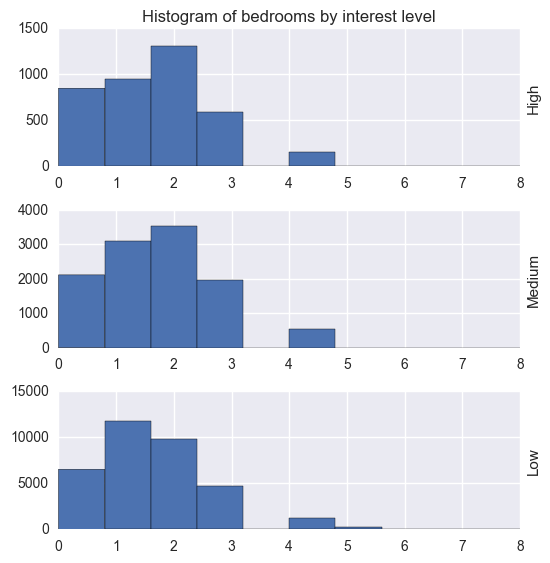

In [12]:
# Plot histograms of number of bedrooms by interest level, to see if there's a meaningful difference
plot_hist_by_interest('bedrooms')

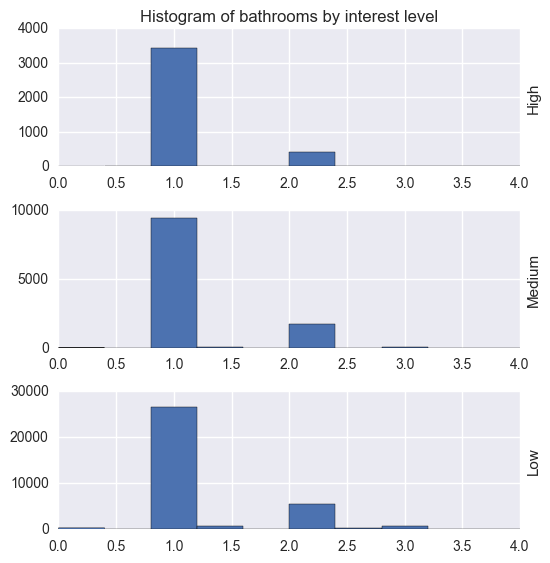

In [13]:
# Histograms of bathrooms...
plot_hist_by_interest('bathrooms', 0, 4)

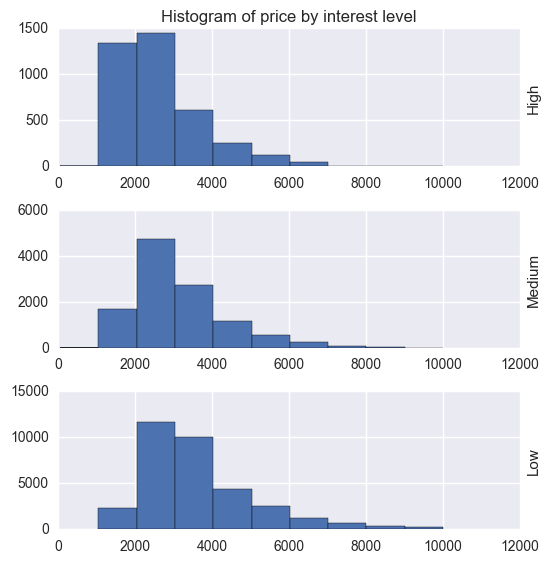

In [14]:
# Histograms of price...
plot_hist_by_interest('price', 0, 10000)

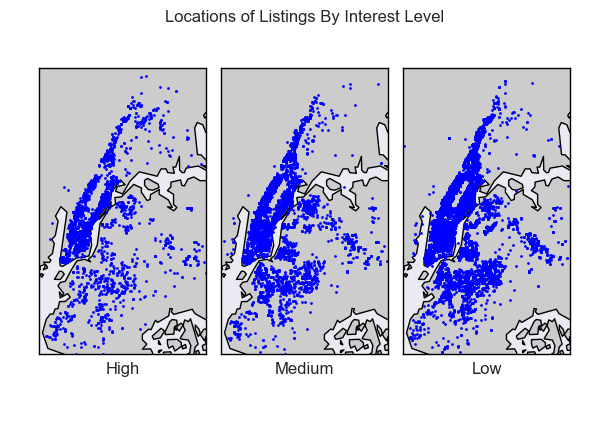

In [41]:
fig = plt.figure()
plt.axis('off')
plt.title('Locations of Listings By Interest Level', size='large')


ax1 = fig.add_subplot(131)
my_map = Basemap(projection='merc', lat_0 = -73.9, lon_0 = 40.8,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-74.05, llcrnrlat=40.6,
    urcrnrlon=-73.8, urcrnrlat=40.925)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents()
my_map.drawmapboundary()
lons = X_train_high_interest.longitude.values
lats = X_train_high_interest.latitude.values
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=2)
ax1.set_xlabel('High', size='large')


ax2 = fig.add_subplot(132)
my_map = Basemap(projection='merc', lat_0 = -73.9, lon_0 = 40.8,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-74.05, llcrnrlat=40.6,
    urcrnrlon=-73.8, urcrnrlat=40.925)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents()
my_map.drawmapboundary()
lons = X_train_med_interest.longitude.values
lats = X_train_med_interest.latitude.values
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=2)
ax2.set_xlabel('Medium', size='large')


ax3 = fig.add_subplot(133)
my_map = Basemap(projection='merc', lat_0 = -73.9, lon_0 = 40.8,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-74.05, llcrnrlat=40.6,
    urcrnrlon=-73.8, urcrnrlat=40.925)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents()
my_map.drawmapboundary()
lons = X_train_low_interest.longitude.values
lats = X_train_low_interest.latitude.values
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=2)
ax3.set_xlabel('Low', size='large')


plt.tight_layout()
plt.show()

# Basic Feature Engineering

In [57]:
for df in [X_train, X_train_low_interest, X_train_med_interest, X_train_high_interest]:
    df['n_features'] = df['features'].apply(lambda x : len(x))

/Users/mattparker/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


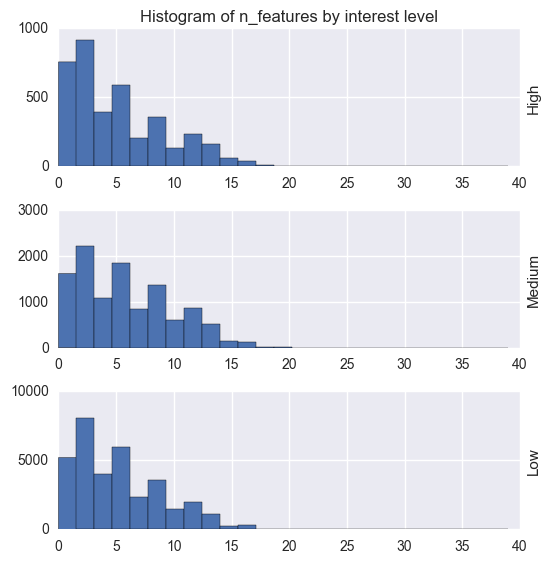

In [19]:
# Plot histogram of number of features of listing by interest level to see if there's a meaningful difference
plot_hist_by_interest('n_features', nbins=25)

## Next step: dummify 'features' column